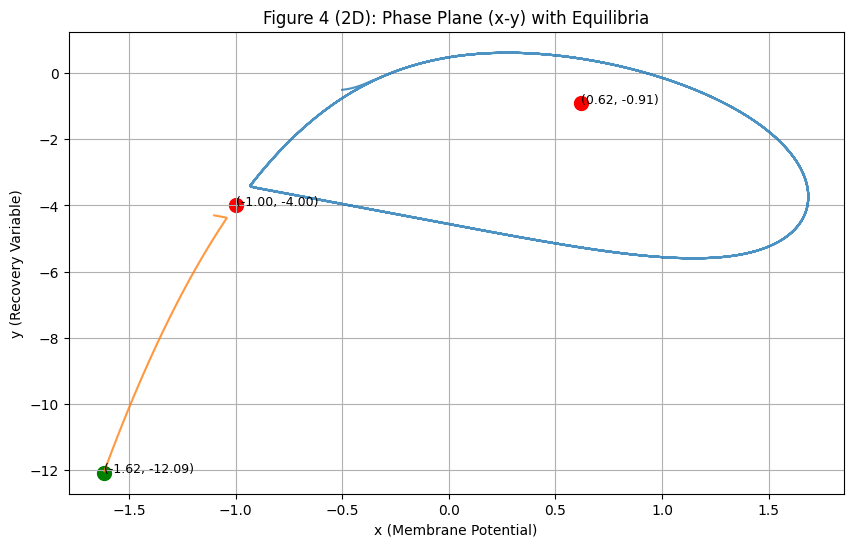

For I = 0:
Equilibrium Point 1: (x, y) = [ -1.61803399 -12.09016994], Stability: Stable
Equilibrium Point 2: (x, y) = [-1. -4.], Stability: Unstable
Equilibrium Point 3: (x, y) = [ 0.61803399 -0.90983006], Stability: Unstable


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from numpy.linalg import eig

# پارامترهای مدل
# a, b, c, d = 1.0, 3, 1.0, 5.0
# I = 1.0  # مقدار جریان ورودی برای شبیه‌سازی


a, b, c, d = 1 , 3,1,5
I = 0  # مقدار جریان ورودی برای شبیه‌سازی
dt = 0.001
T = 100
time = np.arange(0, T, dt)

# تابع مدل Hindmarsh-Rose برای دو معادله
def hindmarsh_rose_2d(x, y, a, b, c, d, I):
    dx = y - a * x**3 + b * x**2 + I
    dy = c - d * x**2 - y
    return dx, dy

# معادلات برای محاسبه نقاط تعادل
def equilibrium_equations_2d(vars, I):
    x, y = vars
    eq1 = y - a * x**3 + b * x**2 + I
    eq2 = c - d * x**2 - y
    return [eq1, eq2]

# ماتریس ژاکوبین برای دو معادله
def jacobian_matrix_2d(x, y):
    J = np.array([
        [-3 * a * x**2 + 2 * b * x, 1],
        [-2 * d * x, -1]
    ])
    return J

# حل معادلات برای نقاط تعادل
def find_equilibria_2d(I):
    equilibria = []
    guesses_x = np.linspace(-3, 3, 100) 
    
     # حدس اولیه
    for guess_x in guesses_x:
        try:
            sol = fsolve(equilibrium_equations_2d, [guess_x, c - d * guess_x**2], args=(I,))
            if not any(np.allclose(sol, eq, atol=1e-3) for eq in equilibria):  # بررسی یکتا بودن
                equilibria.append(sol)
        except:
            continue
    return equilibria

# بررسی پایداری نقاط تعادل
def analyze_stability_2d(equilibria):
    stability = []
    for eq in equilibria:
        x, y = eq
        J = jacobian_matrix_2d(x, y)
        eigenvalues = eig(J)[0]
        if all(np.real(eigenvalues) < 0):
            stability.append("Stable")
        else:
            stability.append("Unstable")
    return stability

# حل معادلات دینامیکی با روش RK4
def solve_hr_2d(I, x0=-0.5, y0=-0.5):
    x, y = x0, y0
    x_values, y_values = [], []
    for t in time:
        x_values.append(x)
        y_values.append(y)

        k1_x, k1_y = hindmarsh_rose_2d(x, y, a, b, c, d, I)
        k2_x, k2_y = hindmarsh_rose_2d(x + dt/2 * k1_x, y + dt/2 * k1_y, a, b, c, d, I)
        k3_x, k3_y = hindmarsh_rose_2d(x + dt/2 * k2_x, y + dt/2 * k2_y, a, b, c, d, I)
        k4_x, k4_y = hindmarsh_rose_2d(x + dt * k3_x, y + dt * k3_y, a, b, c, d, I)

        x += dt / 6 * (k1_x + 2*k2_x + 2*k3_x + k4_x)
        y += dt / 6 * (k1_y + 2*k2_y + 2*k3_y + k4_y)
    return np.array(x_values), np.array(y_values)

# شبیه‌سازی صفحه فازی و نمایش نقاط تعادل
plt.figure(figsize=(10, 6))
x_values, y_values = solve_hr_2d(I)

# رسم صفحه فازی
plt.plot(x_values, y_values, label="Phase Plane (x-y)", alpha=0.8)


x_values, y_values = solve_hr_2d(I , x0=-1.1, y0=-4.3)

# رسم صفحه فازی
plt.plot(x_values, y_values, label="Phase Plane (x-y)", alpha=0.8)


# یافتن نقاط تعادل
equilibria = find_equilibria_2d(I)
stability = analyze_stability_2d(equilibria)

# نمایش نقاط تعادل روی نمودار
for i, eq in enumerate(equilibria):
    x, y = eq
    plt.scatter(x, y, color='red' if stability[i] == "Unstable" else 'green', s=100, label=f"Equilibrium {i+1} ({stability[i]})")
    plt.text(x, y, f"({x:.2f}, {y:.2f})", fontsize=9)

plt.xlabel("x (Membrane Potential)")
plt.ylabel("y (Recovery Variable)")
plt.title("Figure 4 (2D): Phase Plane (x-y) with Equilibria")
# plt.legend()
plt.grid()
plt.show()

# چاپ نقاط تعادل و پایداری آنها
print(f"For I = {I}:")
for i, eq in enumerate(equilibria):
    print(f"Equilibrium Point {i+1}: (x, y) = {eq}, Stability: {stability[i]}")